In [1]:
import pandas as pd
import numpy as np
import fiona
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [2]:
# path="/Users/effie/Desktop/term3/research_module/data/"
path="/Users/mengxi/Documents/GitHub/research_module/data/"

data_firm_no=pd.read_csv(path+"firm_clean/firm_no_ratio.csv")
data_toas=pd.read_csv(path+"firm_clean/toas_ratio.csv")

data_firm_no['regionalkey_'] = data_firm_no['regionalkey_'].astype(str)
data_firm_no['regionalkey_'] = np.where(data_firm_no['regionalkey_'].str.len()<5,"0"+data_firm_no['regionalkey_'],data_firm_no['regionalkey_'])

data_toas['regionalkey_'] = data_toas['regionalkey_'].astype(str)
data_toas['regionalkey_'] = np.where(data_toas['regionalkey_'].str.len()<5,"0"+data_toas['regionalkey_'],data_toas['regionalkey_'])


In [3]:
data_firm_no

,regionalkey_,firms_no,firms_aff_no,ratio
0,01001,1,1.0,1.000000
1,01002,3,1.0,0.333333
2,01003,2,1.0,0.500000
3,01004,5,1.0,0.200000
4,01053,2,1.0,0.500000
...,...,...,...,...
296,16072,1,1.0,1.000000
297,16073,4,NaN,0.000000
298,16074,1,NaN,0.000000
299,16076,1,NaN,0.000000


In [4]:
data_toas

,regionalkey_,toas_sum_county,toas_aff_sum_county,toas_ratio
0,01001,190.090535,190.090535,1.0
1,01002,73.340533,73.340533,1.0
2,01003,298.128822,298.128822,1.0
3,01004,135.135172,135.135172,1.0
4,01053,30.453297,30.453297,1.0
...,...,...,...,...
296,16072,17.628115,17.628115,1.0
297,16073,216.689042,0.000000,0.0
298,16074,3.494731,0.000000,0.0
299,16076,11.030607,0.000000,0.0


In [5]:
plz_shape_df = gpd.read_file('/Users/mengxi/Desktop/financial research/final/map/statistikportal_geodata_2020/K-2020-AI001-5--AI0109--2021-12-14.shp')

plz_shape_df
plz_shape_df=plz_shape_df.reset_index().drop(['index'], axis=1)
plz_shape_df.index=plz_shape_df.index+1

In [6]:
plz_shape_df

,id,schluessel,gen,jahr,ai0109,Shape_Leng,Shape_Area,geometry
1,454271,01001,Flensburg,2020,6.5,0.0,0.0,"POLYGON ((526513.753 6075133.412, 526547.941 6..."
2,454272,01002,Kiel,2020,5.5,0.0,0.0,"POLYGON ((575841.570 6032148.032, 575869.668 6..."
3,454273,01003,Lübeck,2020,14.6,0.0,0.0,"POLYGON ((623056.151 5983746.445, 623191.574 5..."
4,454274,01004,Neumünster,2020,4.3,0.0,0.0,"POLYGON ((565015.652 6000637.513, 565128.417 6..."
5,454275,01051,Dithmarschen,2020,3.6,0.0,0.0,"MULTIPOLYGON (((505053.385 6023856.559, 505143..."
...,...,...,...,...,...,...,...,...
397,454667,16073,Saalfeld-Rudolstadt,2020,54.0,0.0,0.0,"POLYGON ((659352.787 5633725.523, 659501.633 5..."
398,454668,16074,Saale-Holzland-Kreis,2020,37.5,0.0,0.0,"POLYGON ((688961.348 5662575.516, 688976.113 5..."
399,454669,16075,Saale-Orla-Kreis,2020,40.8,0.0,0.0,"POLYGON ((699461.667 5630277.321, 699499.253 5..."
400,454670,16076,Greiz,2020,26.1,0.0,0.0,"POLYGON ((724109.327 5650625.772, 724321.912 5..."


In [7]:
plz_shape_df=plz_shape_df[['schluessel',  'geometry']]
plz_shape_df=plz_shape_df.rename(columns={'schluessel': 'regionalkey_'})

In [8]:
plz_shape_df

,regionalkey_,geometry
1,01001,"POLYGON ((526513.753 6075133.412, 526547.941 6..."
2,01002,"POLYGON ((575841.570 6032148.032, 575869.668 6..."
3,01003,"POLYGON ((623056.151 5983746.445, 623191.574 5..."
4,01004,"POLYGON ((565015.652 6000637.513, 565128.417 6..."
5,01051,"MULTIPOLYGON (((505053.385 6023856.559, 505143..."
...,...,...
397,16073,"POLYGON ((659352.787 5633725.523, 659501.633 5..."
398,16074,"POLYGON ((688961.348 5662575.516, 688976.113 5..."
399,16075,"POLYGON ((699461.667 5630277.321, 699499.253 5..."
400,16076,"POLYGON ((724109.327 5650625.772, 724321.912 5..."


In [9]:
firm_no_plot = pd.merge(left=plz_shape_df, right=data_firm_no, on='regionalkey_',how='left')

firm_no_plot

,regionalkey_,geometry,firms_no,firms_aff_no,ratio
0,01001,"POLYGON ((526513.753 6075133.412, 526547.941 6...",1.0,1.0,1.000000
1,01002,"POLYGON ((575841.570 6032148.032, 575869.668 6...",3.0,1.0,0.333333
2,01003,"POLYGON ((623056.151 5983746.445, 623191.574 5...",2.0,1.0,0.500000
3,01004,"POLYGON ((565015.652 6000637.513, 565128.417 6...",5.0,1.0,0.200000
4,01051,"MULTIPOLYGON (((505053.385 6023856.559, 505143...",NaN,NaN,NaN
...,...,...,...,...,...
396,16073,"POLYGON ((659352.787 5633725.523, 659501.633 5...",4.0,NaN,0.000000
397,16074,"POLYGON ((688961.348 5662575.516, 688976.113 5...",1.0,NaN,0.000000
398,16075,"POLYGON ((699461.667 5630277.321, 699499.253 5...",NaN,NaN,NaN
399,16076,"POLYGON ((724109.327 5650625.772, 724321.912 5...",1.0,NaN,0.000000


In [13]:
firm_no_plot['ratio'].value_counts()

0.000000    102
1.000000     44
0.500000     40
0.250000     26
0.333333     21
0.200000     13
0.142857      9
0.166667      8
0.111111      7
0.100000      7
0.090909      4
0.125000      4
0.083333      3
0.047619      2
0.071429      2
0.045455      1
0.066667      1
0.050000      1
0.055556      1
0.040000      1
0.062500      1
0.038462      1
0.058824      1
Name: ratio, dtype: int64

In [16]:
firm_no_plot['ratio'].isnull().sum()

101

In [10]:
toas_plot = pd.merge(left=plz_shape_df, right=data_toas, on='regionalkey_',how='left')

toas_plot

,regionalkey_,geometry,toas_sum_county,toas_aff_sum_county,toas_ratio
0,01001,"POLYGON ((526513.753 6075133.412, 526547.941 6...",190.090535,190.090535,1.0
1,01002,"POLYGON ((575841.570 6032148.032, 575869.668 6...",73.340533,73.340533,1.0
2,01003,"POLYGON ((623056.151 5983746.445, 623191.574 5...",298.128822,298.128822,1.0
3,01004,"POLYGON ((565015.652 6000637.513, 565128.417 6...",135.135172,135.135172,1.0
4,01051,"MULTIPOLYGON (((505053.385 6023856.559, 505143...",NaN,NaN,NaN
...,...,...,...,...,...
396,16073,"POLYGON ((659352.787 5633725.523, 659501.633 5...",216.689042,0.000000,0.0
397,16074,"POLYGON ((688961.348 5662575.516, 688976.113 5...",3.494731,0.000000,0.0
398,16075,"POLYGON ((699461.667 5630277.321, 699499.253 5...",NaN,NaN,NaN
399,16076,"POLYGON ((724109.327 5650625.772, 724321.912 5...",11.030607,0.000000,0.0


In [14]:
toas_plot['toas_ratio'].value_counts()

1.000000    176
0.000000    102
0.991118      1
0.634103      1
0.028159      1
0.240669      1
0.427839      1
0.151608      1
0.836010      1
0.996335      1
0.862076      1
0.840457      1
1.146924      1
1.000154      1
0.084142      1
0.705943      1
0.999252      1
0.632758      1
0.873121      1
0.167133      1
0.102946      1
0.167701      1
0.014877      1
0.194287      1
Name: toas_ratio, dtype: int64

In [15]:
toas_plot["toas_ratio"].isnull().sum()

101

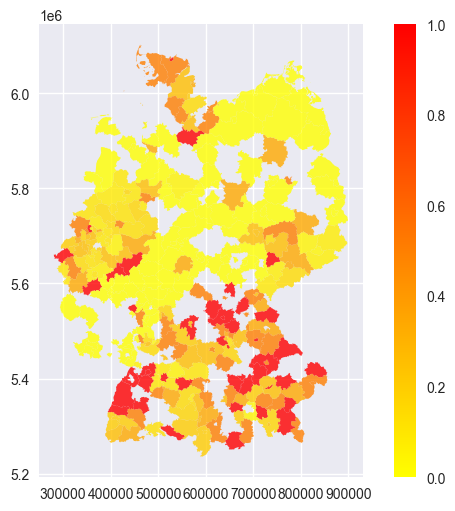

In [11]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

firm_no_plot.plot(
    ax=ax, 
    column='ratio', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8,
);

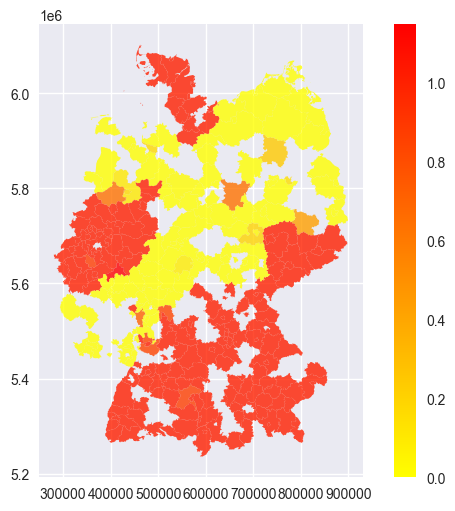

In [12]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

toas_plot.plot(
    ax=ax, 
    column='toas_ratio', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8,
);